<a href="https://colab.research.google.com/github/gouthamkallempudi/googletechdevguide/blob/master/Lesson10_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
#original model
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 205us/step - loss: 0.4484 - acc: 0.8173 - val_loss: 0.3369 - val_acc: 0.8770
Epoch 2/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.2547 - acc: 0.9099 - val_loss: 0.3176 - val_acc: 0.8703
Epoch 3/20
25000/25000 [==============================] - 4s 168us/step - loss: 0.1967 - acc: 0.9294 - val_loss: 0.2822 - val_acc: 0.8881
Epoch 4/20
25000/25000 [==============================] - 4s 169us/step - loss: 0.1669 - acc: 0.9411 - val_loss: 0.2949 - val_acc: 0.8834
Epoch 5/20
25000/25000 [==============================] - 4s 168us/step - loss: 0.1433 - acc: 0.9490 - val_loss: 0.3213 - val_acc: 0.8784
Epoch 6/20
25000/25000 [==============================] - 4s 168us/step - loss: 0.1269 - acc: 0.9556 - val_loss: 0.3464 - val_acc: 0.8730
Epoch 7/20
25000/25000 [==============================] - 4s 168us/step - loss: 0.1130 - acc: 0.9610 - val_loss: 0.3609 - 

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.5235 - acc: 0.8073 - val_loss: 0.4189 - val_acc: 0.8674
Epoch 2/20
25000/25000 [==============================] - 4s 166us/step - loss: 0.3374 - acc: 0.8964 - val_loss: 0.3343 - val_acc: 0.8815
Epoch 3/20
25000/25000 [==============================] - 4s 164us/step - loss: 0.2585 - acc: 0.9163 - val_loss: 0.2935 - val_acc: 0.8895
Epoch 4/20
25000/25000 [==============================] - 4s 175us/step - loss: 0.2155 - acc: 0.9286 - val_loss: 0.2811 - val_acc: 0.8894
Epoch 5/20
25000/25000 [==============================] - 4s 169us/step - loss: 0.1868 - acc: 0.9376 - val_loss: 0.2870 - val_acc: 0.8843
Epoch 6/20
25000/25000 [==============================] - 4s 164us/step - loss: 0.1666 - acc: 0.9430 - val_loss: 0.2832 - val_acc: 0.8856
Epoch 7/20
25000/25000 [==============================] - 4s 164us/step - loss: 0.1506 - acc: 0.9499 - val_loss: 0.2902 - 

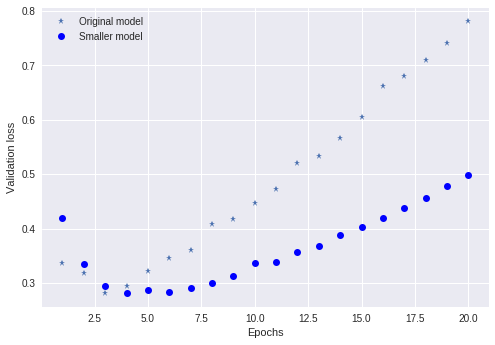

In [10]:
epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

import matplotlib.pyplot as plt
# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, '*', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [11]:
#bigger model
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 20s 794us/step - loss: 0.4641 - acc: 0.7940 - val_loss: 0.2844 - val_acc: 0.8896
Epoch 2/20
25000/25000 [==============================] - 20s 795us/step - loss: 0.2252 - acc: 0.9124 - val_loss: 0.3328 - val_acc: 0.8625
Epoch 3/20
25000/25000 [==============================] - 20s 796us/step - loss: 0.1373 - acc: 0.9484 - val_loss: 0.3084 - val_acc: 0.8858
Epoch 4/20
25000/25000 [==============================] - 18s 701us/step - loss: 0.0610 - acc: 0.9814 - val_loss: 0.4225 - val_acc: 0.8840
Epoch 5/20
25000/25000 [==============================] - 20s 795us/step - loss: 0.0712 - acc: 0.9883 - val_loss: 0.4987 - val_acc: 0.8822
Epoch 6/20
25000/25000 [==============================] - 20s 809us/step - loss: 0.0743 - acc: 0.9875 - val_loss: 0.5233 - val_acc: 0.8691
Epoch 7/20
25000/25000 [==============================] - 20s 797us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.

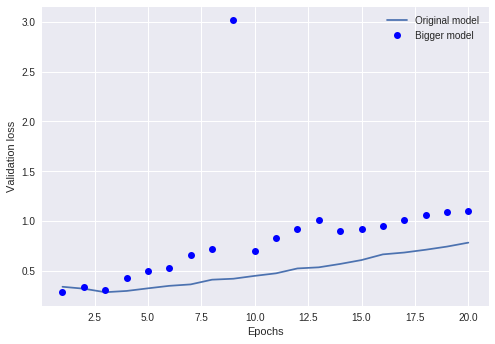

In [15]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, '-', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [16]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 178us/step - loss: 0.4871 - acc: 0.8161 - val_loss: 0.3897 - val_acc: 0.8655
Epoch 2/20
25000/25000 [==============================] - 4s 163us/step - loss: 0.3098 - acc: 0.9059 - val_loss: 0.3307 - val_acc: 0.8889
Epoch 3/20
25000/25000 [==============================] - 4s 162us/step - loss: 0.2648 - acc: 0.9206 - val_loss: 0.3307 - val_acc: 0.8872
Epoch 4/20
25000/25000 [==============================] - 4s 161us/step - loss: 0.2452 - acc: 0.9292 - val_loss: 0.3405 - val_acc: 0.8822
Epoch 5/20
25000/25000 [==============================] - 4s 163us/step - loss: 0.2314 - acc: 0.9353 - val_loss: 0.3805 - val_acc: 0.8684
Epoch 6/20
25000/25000 [==============================] - 4s 162us/step - loss: 0.2231 - acc: 0.9389 - val_loss: 0.3653 - val_acc: 0.8758
Epoch 7/20
25000/25000 [==============================] - 4s 161us/step - loss: 0.2162 - acc: 0.9420 - val_loss: 0.3764 - 

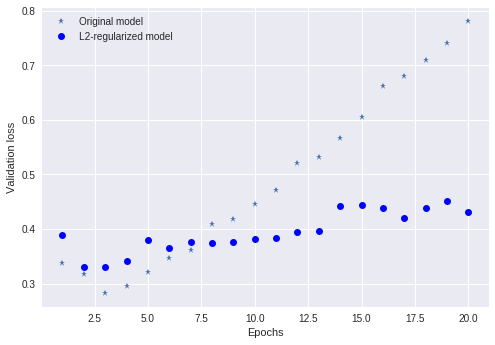

In [17]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, '*', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [18]:
#As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time(Elastic Reqularization)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [19]:
#Adding Dropout
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 189us/step - loss: 0.5899 - acc: 0.6838 - val_loss: 0.4312 - val_acc: 0.8620
Epoch 2/20
25000/25000 [==============================] - 4s 163us/step - loss: 0.4351 - acc: 0.8189 - val_loss: 0.3458 - val_acc: 0.8725
Epoch 3/20
25000/25000 [==============================] - 4s 162us/step - loss: 0.3471 - acc: 0.8707 - val_loss: 0.2932 - val_acc: 0.8855
Epoch 4/20
25000/25000 [==============================] - 4s 163us/step - loss: 0.2889 - acc: 0.8984 - val_loss: 0.2761 - val_acc: 0.8881
Epoch 5/20
25000/25000 [==============================] - 4s 163us/step - loss: 0.2542 - acc: 0.9136 - val_loss: 0.2802 - val_acc: 0.8880
Epoch 6/20
25000/25000 [==============================] - 4s 162us/step - loss: 0.2227 - acc: 0.9260 - val_loss: 0.2883 - val_acc: 0.8864
Epoch 7/20
25000/25000 [==============================] - 4s 162us/step - loss: 0.1983 - acc: 0.9350 - val_loss: 0.3172 - 

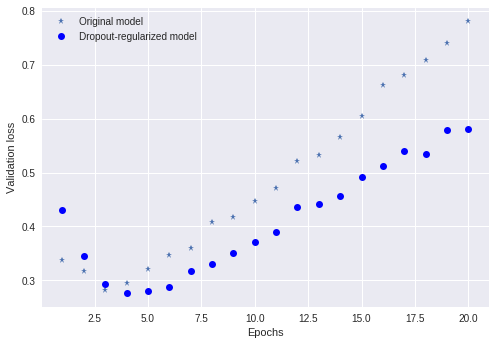

In [21]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, '*', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()